In [ ]:
# Passo 1: Importar as bibliotecas necessárias
# ------------------------------------------------
# - pandas: para criar e manipular nosso conjunto de dados.
# - scikit-learn: uma das principais bibliotecas de Machine Learning em Python.
#   - KMeans: para aplicar o algoritmo de agrupamento.
#   - make_blobs: para gerar dados sintéticos que simulam nossas motos.
# - matplotlib e seaborn: para visualizar os dados e os resultados.

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Passo 2: Gerar os dados sintéticos (Nossas Motocicletas)
# ---------------------------------------------------------
# Como não temos um arquivo real, vamos criar um conjunto de dados que
# representa as motocicletas da liga dieselpunk.
#
# make_blobs é perfeito para isso, pois cria "bolhas" de dados, que são
# ideais para testar algoritmos de clusterização.
#
# - n_samples: número total de motocicletas na nossa liga.
# - n_features: quantas características vamos analisar (Peso e Aceleração).
# - centers: o número de "gangues" ou estilos distintos que queremos que os dados simulem.
# - cluster_std: o desvio padrão dos clusters. Um valor maior torna os grupos menos definidos.
# - random_state: garante que os dados gerados sejam sempre os mesmos, para reprodutibilidade.

n_gangues = 3 # Vamos simular 3 grupos principais: Pesadas, Rápidas e Modificadas
pontos, _ = make_blobs(n_samples=300,
                       n_features=2,
                       centers=n_gangues,
                       cluster_std=1.2,
                       random_state=42)

# Vamos nomear nossas características para ficar mais claro
# Característica 0 -> "Peso" (kg)
# Característica 1 -> "Aceleração" (0-100 km/h em s)
df_motos = pd.DataFrame(pontos, columns=['Peso', 'Aceleração'])

print("\n--- Amostra dos Dados Gerados ---")
print(df_motos.head())
print(f"\nTotal de {len(df_motos)} motocicletas geradas.")


--- Amostra dos Dados Gerados ---
       Peso  Aceleração
0 -7.430860   -7.899923
1 -7.912123   -7.341576
2 -1.522144    7.549274
3  4.378661    3.291702
4 -9.325377   -8.089813

Total de 300 motocicletas geradas.


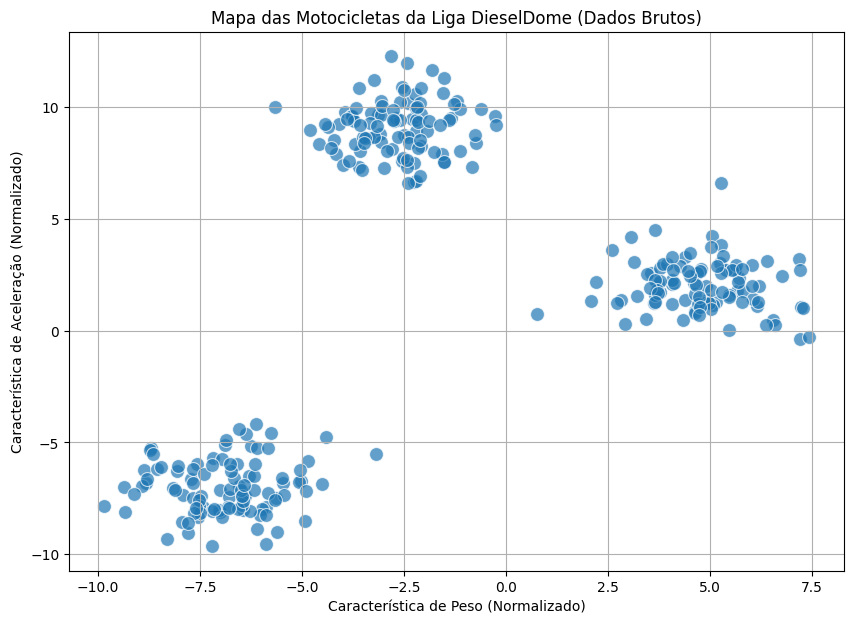


Visualização inicial gerada.


In [ ]:
# Passo 3: Visualizar os dados brutos
# ------------------------------------
# Antes de aplicar o algoritmo, é sempre bom "olhar" para os dados.
# Isso nos ajuda a ter uma intuição se há padrões visíveis.

plt.figure(figsize=(10, 7))
sns.scatterplot(x='Peso', y='Aceleração', data=df_motos, s=100, alpha=0.7)
plt.title('Mapa das Motocicletas da Liga DieselDome (Dados Brutos)')
plt.xlabel('Característica de Peso (Normalizado)')
plt.ylabel('Característica de Aceleração (Normalizado)')
plt.grid(True)
plt.show()

print("\nVisualização inicial gerada.")

In [ ]:
# Passo 4: Aplicar o Algoritmo K-Means
# -------------------------------------
# Aqui a "mágica" acontece. O K-Means vai analisar a posição de cada ponto
# e agrupá-los com base na proximidade.
#
# - n_clusters: O parâmetro mais importante. Dizemos ao algoritmo quantos grupos (K) queremos encontrar.
#   Neste caso, suspeitamos que existam 3 tipos de gangues.
# - init='k-means++': Uma forma inteligente de inicializar os centróides, o que melhora a convergência.
# - n_init=10: O algoritmo será executado 10 vezes com diferentes pontos de partida e o melhor resultado será escolhido.
# - random_state: Para reprodutibilidade do algoritmo.

kmeans = KMeans(n_clusters=n_gangues, init='k-means++', n_init=10, random_state=42)

# Treinamos o modelo com nossos dados. O K-Means "aprende" os grupos.
kmeans.fit(df_motos)

# O resultado do agrupamento está em 'kmeans.labels_'.
# Vamos adicionar essa informação ao nosso DataFrame.
df_motos['Gangue_Identificada'] = kmeans.labels_

print("Cada motocicleta foi atribuída a um dos 3 grupos.")
print("\n--- Amostra dos Dados com os Grupos ---")
print(df_motos.head())

Cada motocicleta foi atribuída a um dos 3 grupos.

--- Amostra dos Dados com os Grupos ---
       Peso  Aceleração  Gangue_Identificada
0 -7.430860   -7.899923                    1
1 -7.912123   -7.341576                    1
2 -1.522144    7.549274                    0
3  4.378661    3.291702                    2
4 -9.325377   -8.089813                    1


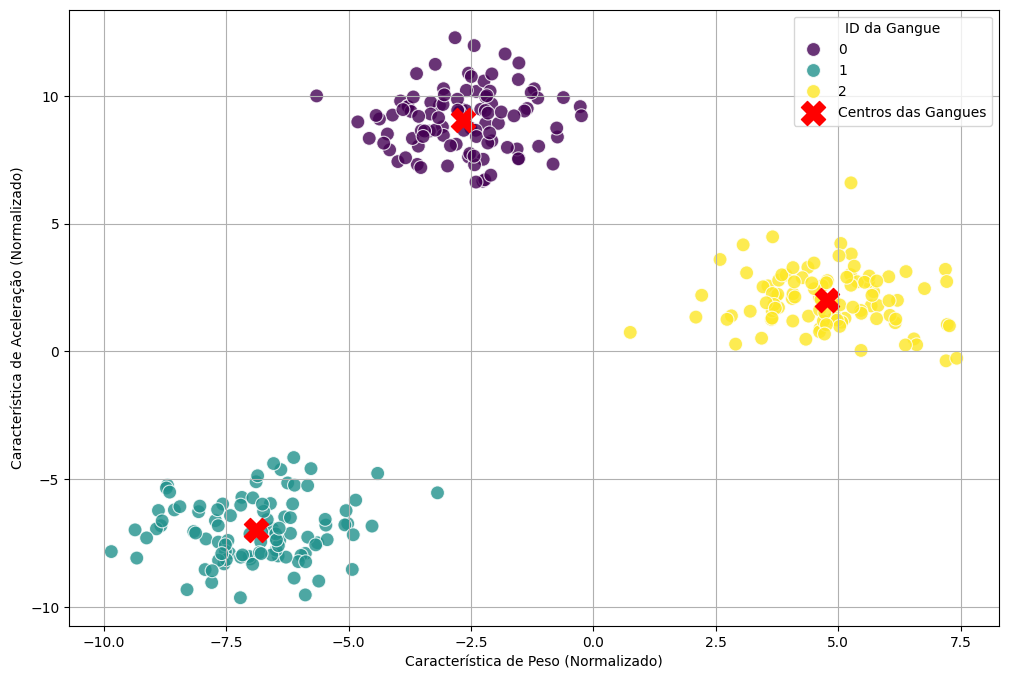


--- Análise Final ---
O gráfico final mostra claramente os 3 grupos distintos que o algoritmo encontrou.
Grupo 0 (Roxo): Poderiam ser as motos 'Pesadas e Blindadas'.
Grupo 1 (Verde): Poderiam ser as 'Leves e Rápidas'.
Grupo 2 (Amarelo): Poderiam ser as que usam 'Modificações Ilegais', com um balanço diferente de peso e aceleração.


In [ ]:
# Passo 5: Visualizar os Resultados do Agrupamento
# ------------------------------------------------
# Agora, vamos criar o mesmo gráfico de antes, mas colorindo cada ponto
# de acordo com o grupo (cluster) que o K-Means encontrou.
# Também vamos plotar os "centróides", que são o centro de cada grupo.

# Pegando as coordenadas dos centróides
centroides = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))

# Usamos o `hue` para colorir os pontos com base na coluna 'Gangue_Identificada'
sns.scatterplot(x='Peso', y='Aceleração', hue='Gangue_Identificada', data=df_motos,
                palette='viridis', s=100, alpha=0.8, legend='full')

# Plotando os centróides
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, c='red', marker='X', label='Centros das Gangues')

plt.xlabel('Característica de Peso (Normalizado)')
plt.ylabel('Característica de Aceleração (Normalizado)')
plt.legend(title='ID da Gangue')
plt.grid(True)
plt.show()

print("\n--- Análise Final ---")
print("O gráfico final mostra claramente os 3 grupos distintos que o algoritmo encontrou.")
print("Grupo 0 (Roxo): Poderiam ser as motos 'Pesadas e Blindadas'.")
print("Grupo 1 (Verde): Poderiam ser as 'Leves e Rápidas'.")
print("Grupo 2 (Amarelo): Poderiam ser as que usam 'Modificações Ilegais', com um balanço diferente de peso e aceleração.")